<a href="https://colab.research.google.com/github/DJCordhose/ai/blob/master/notebooks/tf2/nn-training.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install -q tf-nightly-gpu-2.0-preview

     |████████████████████████████████| 346.3MB 56kB/s 
     |████████████████████████████████| 430kB 44.0MB/s 
     |████████████████████████████████| 61kB 27.5MB/s 
     |████████████████████████████████| 3.1MB 43.6MB/s 
ERROR: thinc 6.12.1 has requirement wrapt<1.11.0,>=1.10.0, but you'll have wrapt 1.11.1 which is incompatible.


In [2]:
import tensorflow as tf
print(tf.__version__)

2.0.0-dev20190501


In [0]:
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf
import numpy as np
from tensorflow import keras

In [4]:
!curl -O https://raw.githubusercontent.com/DJCordhose/deep-learning-crash-course-notebooks/master/data/insurance-customers-1500.csv

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 26783  100 26783    0     0   105k      0 --:--:-- --:--:-- --:--:--  105k


In [5]:
df = pd.read_csv('./insurance-customers-1500.csv', sep=';')
y = df['group']
df.drop('group', axis='columns', inplace=True)
X = df.as_matrix()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  after removing the cwd from sys.path.


In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [7]:
from tensorflow.keras.layers import Dense

model = keras.Sequential()

model.add(Dense(units=50, activation='relu', input_dim=3))
model.add(Dense(units=3, activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 50)                200       
_________________________________________________________________
dense_1 (Dense)              (None, 3)                 153       
Total params: 353
Trainable params: 353
Non-trainable params: 0
_________________________________________________________________


In [8]:
BATCH_SIZE=1000
EPOCHS = 2000

model.compile(loss='sparse_categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

%time history = model.fit(X_train, y_train, epochs=EPOCHS, batch_size=BATCH_SIZE, validation_split=0.2, verbose=0)

CPU times: user 13.5 s, sys: 1.15 s, total: 14.6 s
Wall time: 11.9 s


In [9]:
train_loss, train_accuracy = model.evaluate(X_train, y_train, batch_size=BATCH_SIZE)
train_accuracy

1200/1200 [==============================] - 0s 33us/sample - loss: 0.7201 - accuracy: 0.7042


0.70416665

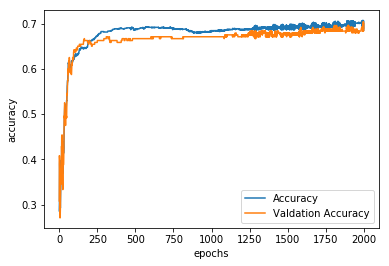

In [17]:
# plt.yscale('log')
plt.ylabel("accuracy")
plt.xlabel("epochs")

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

plt.legend(["Accuracy", "Valdation Accuracy"])

In [13]:
model.predict(np.array([[100, 47, 10]]))

array([[0.13502085, 0.7626601 , 0.1023191 ]], dtype=float32)

In [14]:
test_loss, test_accuracy = model.evaluate(X_test, y_test, batch_size=BATCH_SIZE)
test_accuracy

300/300 [==============================] - 0s 62us/sample - loss: 0.6884 - accuracy: 0.7233


0.72333336